In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df = data_df_full[cols].copy()
data_df.head(10)

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
5,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,39,7,0,3,83,4,0,14,101,...,0,0,140,4,0,0,56,8,549,0
6,NITNLCPFGEVFNATRFVSVYAWNRKRISNCVADYSVLYNSASFST...,1,1,24,154,0,0,1,104,3,...,2,0,48,0,0,0,102,1,0,0
7,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,4,0,0,0,1,0,...,0,0,0,0,0,0,3,0,0,0
8,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,1,0,59,7,0,4,53,23,3,...,5,0,4,0,0,0,26,4,0,0
9,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,16,0,0,0,4,0,...,0,0,8,0,0,0,0,0,0,0


In [3]:
X = data_df['x']
y = data_df[y_cols]

In [4]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
# alphabet=['A', 'C', 'D', 'E', 'F',
#           'G', 'H', 'I', 'K', 'L',
#           'M', 'N', 'P', 'Q', 'R',
#           'S', 'T', 'V', 'W', 'Y', '*']


alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y']


Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=201, Y=64


In [5]:
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

# # instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)



2022-06-03 15:40:30.252528: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [7]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [8]:
print(N_y)

TiteSeq_01_bin1     2579236
TiteSeq_01_bin2     1157805
TiteSeq_01_bin3     1626103
TiteSeq_01_bin4     5929980
TiteSeq_02_bin1     2676486
                     ...   
TiteSeq_15_bin4      401678
TiteSeq_16_bin1    10930706
TiteSeq_16_bin2      684127
TiteSeq_16_bin3     1299065
TiteSeq_16_bin4      254070
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [9]:
bounds = np.array([[0,180],[180,1400],[1400,10500],[10500,250000]])
bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0,180
1,180,1400
2,1400,10500
3,10500,250000


### I don't know how to obtain these values
Using arbitrary values for now just to be able to debug Titeseq MP.
Get these from figure 2B

In [10]:
mu_neg = 50
mu_pos = 700000
sigma_neg = 100
sigma_pos = 50000

In [11]:
mp_list = [mavenn.measurement_process_layers.DiscreteMonotonicMP(info_for_layers_dict={'H_y_norm':0},
                                                                      Y=4,
                                                                      K=10,
                                                                      eta=1e-5,)
           for mp in range(len(y_cols)//4)
          ]

In [12]:
# there are 16 measurement processes in this 
len(mp_list)

16

In [13]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [14]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [15]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=False)

N = 83,880 observations set as training data.
Using 20.1% for validation.
Time to set data: 23.2 sec.


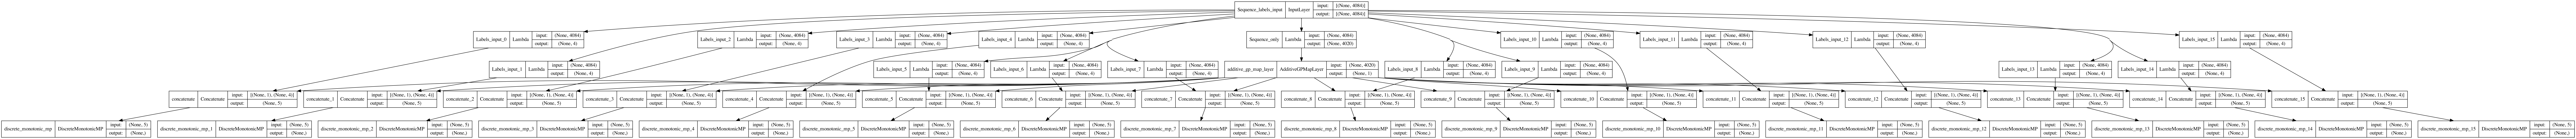

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=300,to_file='titeseq_dar.png')

In [17]:

# Fit model to data
model.fit(learning_rate=.001,
          epochs=75,
          batch_size=400,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=5,
          linear_initialization=False)

Epoch 1/75
168/168 [==============================] - 22s 49ms/step - loss: 1030595.6250 - discrete_monotonic_mp_loss: 75767.1875 - discrete_monotonic_mp_1_loss: 71171.5391 - discrete_monotonic_mp_2_loss: 75495.5938 - discrete_monotonic_mp_3_loss: 78677.1016 - discrete_monotonic_mp_4_loss: 79085.1641 - discrete_monotonic_mp_5_loss: 82815.1484 - discrete_monotonic_mp_6_loss: 78854.5781 - discrete_monotonic_mp_7_loss: 73128.9688 - discrete_monotonic_mp_8_loss: 65352.4180 - discrete_monotonic_mp_9_loss: 55554.1641 - discrete_monotonic_mp_10_loss: 60686.2461 - discrete_monotonic_mp_11_loss: 68192.7812 - discrete_monotonic_mp_12_loss: 44289.6953 - discrete_monotonic_mp_13_loss: 37824.3320 - discrete_monotonic_mp_14_loss: 39121.8125 - discrete_monotonic_mp_15_loss: 44578.8359 - I_var: -0.2683 - val_loss: 910401.8750 - val_discrete_monotonic_mp_loss: 65016.3086 - val_discrete_monotonic_mp_1_loss: 64210.4922 - val_discrete_monotonic_mp_2_loss: 66217.1641 - val_discrete_monotonic_mp_3_loss: 703

168/168 [==============================] - 4s 23ms/step - loss: 830123.5625 - discrete_monotonic_mp_loss: 54444.9922 - discrete_monotonic_mp_1_loss: 56709.2891 - discrete_monotonic_mp_2_loss: 59531.1133 - discrete_monotonic_mp_3_loss: 63613.2070 - discrete_monotonic_mp_4_loss: 60203.4141 - discrete_monotonic_mp_5_loss: 66375.4453 - discrete_monotonic_mp_6_loss: 61510.5664 - discrete_monotonic_mp_7_loss: 61103.4883 - discrete_monotonic_mp_8_loss: 56403.6914 - discrete_monotonic_mp_9_loss: 48867.5703 - discrete_monotonic_mp_10_loss: 53251.4688 - discrete_monotonic_mp_11_loss: 60322.5820 - discrete_monotonic_mp_12_loss: 31252.7090 - discrete_monotonic_mp_13_loss: 29484.5293 - discrete_monotonic_mp_14_loss: 31246.6211 - discrete_monotonic_mp_15_loss: 35802.6367 - I_var: -0.0430 - val_loss: 765817.5000 - val_discrete_monotonic_mp_loss: 50105.9180 - val_discrete_monotonic_mp_1_loss: 51716.9336 - val_discrete_monotonic_mp_2_loss: 54883.7930 - val_discrete_monotonic_mp_3_loss: 57947.7773 - val

168/168 [==============================] - 5s 27ms/step - loss: 689428.3750 - discrete_monotonic_mp_loss: 38759.0703 - discrete_monotonic_mp_1_loss: 42147.9219 - discrete_monotonic_mp_2_loss: 47505.4062 - discrete_monotonic_mp_3_loss: 46882.4531 - discrete_monotonic_mp_4_loss: 44676.9414 - discrete_monotonic_mp_5_loss: 50697.5625 - discrete_monotonic_mp_6_loss: 47720.8789 - discrete_monotonic_mp_7_loss: 49102.6680 - discrete_monotonic_mp_8_loss: 46424.3359 - discrete_monotonic_mp_9_loss: 42078.9922 - discrete_monotonic_mp_10_loss: 51042.8867 - discrete_monotonic_mp_11_loss: 57273.6641 - discrete_monotonic_mp_12_loss: 30479.3809 - discrete_monotonic_mp_13_loss: 28641.2695 - discrete_monotonic_mp_14_loss: 30720.2480 - discrete_monotonic_mp_15_loss: 35274.4258 - I_var: -0.0306 - val_loss: 645485.4375 - val_discrete_monotonic_mp_loss: 36617.9961 - val_discrete_monotonic_mp_1_loss: 39741.3516 - val_discrete_monotonic_mp_2_loss: 44739.3828 - val_discrete_monotonic_mp_3_loss: 44028.4219 - val

168/168 [==============================] - 6s 34ms/step - loss: 652313.1875 - discrete_monotonic_mp_loss: 35167.6094 - discrete_monotonic_mp_1_loss: 39125.9531 - discrete_monotonic_mp_2_loss: 44947.5234 - discrete_monotonic_mp_3_loss: 42964.1328 - discrete_monotonic_mp_4_loss: 41134.1055 - discrete_monotonic_mp_5_loss: 47008.7188 - discrete_monotonic_mp_6_loss: 43872.5273 - discrete_monotonic_mp_7_loss: 46137.8242 - discrete_monotonic_mp_8_loss: 42489.8711 - discrete_monotonic_mp_9_loss: 39140.4258 - discrete_monotonic_mp_10_loss: 50420.1641 - discrete_monotonic_mp_11_loss: 56052.8281 - discrete_monotonic_mp_12_loss: 30218.4297 - discrete_monotonic_mp_13_loss: 28372.4492 - discrete_monotonic_mp_14_loss: 30457.5703 - discrete_monotonic_mp_15_loss: 34802.6406 - I_var: -0.0195 - val_loss: 617445.2500 - val_discrete_monotonic_mp_loss: 33732.6836 - val_discrete_monotonic_mp_1_loss: 37327.3477 - val_discrete_monotonic_mp_2_loss: 42727.3633 - val_discrete_monotonic_mp_3_loss: 40990.6953 - val

168/168 [==============================] - 4s 27ms/step - loss: 633670.7500 - discrete_monotonic_mp_loss: 33863.9375 - discrete_monotonic_mp_1_loss: 37803.8711 - discrete_monotonic_mp_2_loss: 44105.0117 - discrete_monotonic_mp_3_loss: 41298.0352 - discrete_monotonic_mp_4_loss: 39649.4336 - discrete_monotonic_mp_5_loss: 45173.5430 - discrete_monotonic_mp_6_loss: 41749.7578 - discrete_monotonic_mp_7_loss: 44244.5664 - discrete_monotonic_mp_8_loss: 39910.2695 - discrete_monotonic_mp_9_loss: 37690.9297 - discrete_monotonic_mp_10_loss: 49793.3398 - discrete_monotonic_mp_11_loss: 55039.0586 - discrete_monotonic_mp_12_loss: 30071.2891 - discrete_monotonic_mp_13_loss: 28271.7949 - discrete_monotonic_mp_14_loss: 30349.2852 - discrete_monotonic_mp_15_loss: 34656.4219 - I_var: -0.0156 - val_loss: 603722.3750 - val_discrete_monotonic_mp_loss: 32690.5566 - val_discrete_monotonic_mp_1_loss: 36232.0156 - val_discrete_monotonic_mp_2_loss: 42063.5039 - val_discrete_monotonic_mp_3_loss: 39652.9805 - val

168/168 [==============================] - 4s 22ms/step - loss: 625377.8125 - discrete_monotonic_mp_loss: 33164.1328 - discrete_monotonic_mp_1_loss: 36965.7734 - discrete_monotonic_mp_2_loss: 43650.3555 - discrete_monotonic_mp_3_loss: 40324.9531 - discrete_monotonic_mp_4_loss: 38762.6445 - discrete_monotonic_mp_5_loss: 44367.4531 - discrete_monotonic_mp_6_loss: 40933.0508 - discrete_monotonic_mp_7_loss: 43505.4844 - discrete_monotonic_mp_8_loss: 39103.5078 - discrete_monotonic_mp_9_loss: 37303.3516 - discrete_monotonic_mp_10_loss: 49470.9727 - discrete_monotonic_mp_11_loss: 54676.9922 - discrete_monotonic_mp_12_loss: 30016.6543 - discrete_monotonic_mp_13_loss: 28256.0586 - discrete_monotonic_mp_14_loss: 30283.6895 - discrete_monotonic_mp_15_loss: 34592.2812 - I_var: -0.0115 - val_loss: 596141.0000 - val_discrete_monotonic_mp_loss: 32164.2578 - val_discrete_monotonic_mp_1_loss: 35568.2617 - val_discrete_monotonic_mp_2_loss: 41778.7891 - val_discrete_monotonic_mp_3_loss: 38972.6797 - val

168/168 [==============================] - 4s 25ms/step - loss: 625414.3125 - discrete_monotonic_mp_loss: 33098.1367 - discrete_monotonic_mp_1_loss: 36736.5898 - discrete_monotonic_mp_2_loss: 43716.4023 - discrete_monotonic_mp_3_loss: 40189.2422 - discrete_monotonic_mp_4_loss: 38637.0859 - discrete_monotonic_mp_5_loss: 44479.3711 - discrete_monotonic_mp_6_loss: 41050.3516 - discrete_monotonic_mp_7_loss: 43528.8789 - discrete_monotonic_mp_8_loss: 39245.5078 - discrete_monotonic_mp_9_loss: 37569.0078 - discrete_monotonic_mp_10_loss: 49416.1406 - discrete_monotonic_mp_11_loss: 54769.5664 - discrete_monotonic_mp_12_loss: 30040.3418 - discrete_monotonic_mp_13_loss: 28245.3887 - discrete_monotonic_mp_14_loss: 30161.1328 - discrete_monotonic_mp_15_loss: 34530.6250 - I_var: -0.0094 - val_loss: 590274.8750 - val_discrete_monotonic_mp_loss: 31724.9023 - val_discrete_monotonic_mp_1_loss: 34939.1172 - val_discrete_monotonic_mp_2_loss: 41546.1680 - val_discrete_monotonic_mp_3_loss: 38369.7734 - val

168/168 [==============================] - 4s 23ms/step - loss: 613322.8750 - discrete_monotonic_mp_loss: 32248.9141 - discrete_monotonic_mp_1_loss: 35675.3672 - discrete_monotonic_mp_2_loss: 43134.7695 - discrete_monotonic_mp_3_loss: 39010.4453 - discrete_monotonic_mp_4_loss: 37620.3828 - discrete_monotonic_mp_5_loss: 43356.2695 - discrete_monotonic_mp_6_loss: 39855.1445 - discrete_monotonic_mp_7_loss: 42315.9453 - discrete_monotonic_mp_8_loss: 37888.8008 - discrete_monotonic_mp_9_loss: 36720.1836 - discrete_monotonic_mp_10_loss: 48856.6328 - discrete_monotonic_mp_11_loss: 54030.0195 - discrete_monotonic_mp_12_loss: 29891.4102 - discrete_monotonic_mp_13_loss: 28185.2578 - discrete_monotonic_mp_14_loss: 30029.1406 - discrete_monotonic_mp_15_loss: 34503.5703 - I_var: -0.0070 - val_loss: 584867.8750 - val_discrete_monotonic_mp_loss: 31291.4512 - val_discrete_monotonic_mp_1_loss: 34314.9727 - val_discrete_monotonic_mp_2_loss: 41290.2656 - val_discrete_monotonic_mp_3_loss: 37800.0234 - val

168/168 [==============================] - 7s 44ms/step - loss: 607887.3750 - discrete_monotonic_mp_loss: 31801.9688 - discrete_monotonic_mp_1_loss: 35020.3984 - discrete_monotonic_mp_2_loss: 42764.9414 - discrete_monotonic_mp_3_loss: 38380.2930 - discrete_monotonic_mp_4_loss: 37142.2266 - discrete_monotonic_mp_5_loss: 42783.9570 - discrete_monotonic_mp_6_loss: 39259.8008 - discrete_monotonic_mp_7_loss: 41813.1250 - discrete_monotonic_mp_8_loss: 37345.2969 - discrete_monotonic_mp_9_loss: 36542.7266 - discrete_monotonic_mp_10_loss: 48688.1211 - discrete_monotonic_mp_11_loss: 53877.0195 - discrete_monotonic_mp_12_loss: 29864.0488 - discrete_monotonic_mp_13_loss: 28135.6191 - discrete_monotonic_mp_14_loss: 29986.4395 - discrete_monotonic_mp_15_loss: 34480.8164 - I_var: -0.0073 - val_loss: 582079.7500 - val_discrete_monotonic_mp_loss: 31052.8320 - val_discrete_monotonic_mp_1_loss: 33889.5117 - val_discrete_monotonic_mp_2_loss: 41078.6562 - val_discrete_monotonic_mp_3_loss: 37445.6250 - val

168/168 [==============================] - 5s 28ms/step - loss: 604037.5625 - discrete_monotonic_mp_loss: 31442.8398 - discrete_monotonic_mp_1_loss: 34509.7852 - discrete_monotonic_mp_2_loss: 42407.9922 - discrete_monotonic_mp_3_loss: 37840.8906 - discrete_monotonic_mp_4_loss: 36668.5742 - discrete_monotonic_mp_5_loss: 42294.1133 - discrete_monotonic_mp_6_loss: 38993.4609 - discrete_monotonic_mp_7_loss: 41532.2773 - discrete_monotonic_mp_8_loss: 37094.4883 - discrete_monotonic_mp_9_loss: 36493.1914 - discrete_monotonic_mp_10_loss: 48581.7656 - discrete_monotonic_mp_11_loss: 53809.6250 - discrete_monotonic_mp_12_loss: 29845.4453 - discrete_monotonic_mp_13_loss: 28106.0469 - discrete_monotonic_mp_14_loss: 29968.2988 - discrete_monotonic_mp_15_loss: 34448.1562 - I_var: -0.0096 - val_loss: 577287.8125 - val_discrete_monotonic_mp_loss: 30639.6113 - val_discrete_monotonic_mp_1_loss: 33343.5781 - val_discrete_monotonic_mp_2_loss: 40672.6172 - val_discrete_monotonic_mp_3_loss: 36830.1133 - val

168/168 [==============================] - 4s 27ms/step - loss: 607511.1250 - discrete_monotonic_mp_loss: 31484.7422 - discrete_monotonic_mp_1_loss: 34470.6445 - discrete_monotonic_mp_2_loss: 42297.7500 - discrete_monotonic_mp_3_loss: 37917.0977 - discrete_monotonic_mp_4_loss: 36579.1172 - discrete_monotonic_mp_5_loss: 42525.8867 - discrete_monotonic_mp_6_loss: 39584.5859 - discrete_monotonic_mp_7_loss: 42056.7266 - discrete_monotonic_mp_8_loss: 37960.8516 - discrete_monotonic_mp_9_loss: 37031.2461 - discrete_monotonic_mp_10_loss: 48807.0312 - discrete_monotonic_mp_11_loss: 54307.9023 - discrete_monotonic_mp_12_loss: 29933.9238 - discrete_monotonic_mp_13_loss: 28107.9629 - discrete_monotonic_mp_14_loss: 29978.3223 - discrete_monotonic_mp_15_loss: 34466.5430 - I_var: -0.0068 - val_loss: 638154.6875 - val_discrete_monotonic_mp_loss: 34187.6836 - val_discrete_monotonic_mp_1_loss: 36967.2734 - val_discrete_monotonic_mp_2_loss: 43416.4805 - val_discrete_monotonic_mp_3_loss: 42044.9727 - val

168/168 [==============================] - 6s 38ms/step - loss: 596863.6875 - discrete_monotonic_mp_loss: 30825.5488 - discrete_monotonic_mp_1_loss: 33772.1562 - discrete_monotonic_mp_2_loss: 41696.7383 - discrete_monotonic_mp_3_loss: 36985.1484 - discrete_monotonic_mp_4_loss: 35661.2930 - discrete_monotonic_mp_5_loss: 41341.7539 - discrete_monotonic_mp_6_loss: 38385.9219 - discrete_monotonic_mp_7_loss: 40951.8359 - discrete_monotonic_mp_8_loss: 36640.8359 - discrete_monotonic_mp_9_loss: 36289.9922 - discrete_monotonic_mp_10_loss: 48362.3438 - discrete_monotonic_mp_11_loss: 53693.3516 - discrete_monotonic_mp_12_loss: 29808.5977 - discrete_monotonic_mp_13_loss: 28045.1016 - discrete_monotonic_mp_14_loss: 29943.5000 - discrete_monotonic_mp_15_loss: 34458.8711 - I_var: -0.0077 - val_loss: 569768.7500 - val_discrete_monotonic_mp_loss: 29946.2500 - val_discrete_monotonic_mp_1_loss: 32529.9082 - val_discrete_monotonic_mp_2_loss: 39957.3828 - val_discrete_monotonic_mp_3_loss: 35860.2461 - val

168/168 [==============================] - 4s 27ms/step - loss: 595322.8125 - discrete_monotonic_mp_loss: 30591.0137 - discrete_monotonic_mp_1_loss: 33570.8008 - discrete_monotonic_mp_2_loss: 41482.3789 - discrete_monotonic_mp_3_loss: 36733.1914 - discrete_monotonic_mp_4_loss: 35327.5195 - discrete_monotonic_mp_5_loss: 41104.5430 - discrete_monotonic_mp_6_loss: 38208.8164 - discrete_monotonic_mp_7_loss: 40906.1953 - discrete_monotonic_mp_8_loss: 36653.7617 - discrete_monotonic_mp_9_loss: 36309.2422 - discrete_monotonic_mp_10_loss: 48418.5977 - discrete_monotonic_mp_11_loss: 53749.5938 - discrete_monotonic_mp_12_loss: 29792.2656 - discrete_monotonic_mp_13_loss: 28050.8105 - discrete_monotonic_mp_14_loss: 29947.4785 - discrete_monotonic_mp_15_loss: 34475.5078 - I_var: -0.0059 - val_loss: 568691.3750 - val_discrete_monotonic_mp_loss: 29825.4082 - val_discrete_monotonic_mp_1_loss: 32455.4473 - val_discrete_monotonic_mp_2_loss: 39822.1562 - val_discrete_monotonic_mp_3_loss: 35759.8203 - val

168/168 [==============================] - 5s 30ms/step - loss: 600269.5625 - discrete_monotonic_mp_loss: 30845.7812 - discrete_monotonic_mp_1_loss: 33872.5859 - discrete_monotonic_mp_2_loss: 41642.8164 - discrete_monotonic_mp_3_loss: 37124.7656 - discrete_monotonic_mp_4_loss: 35638.0664 - discrete_monotonic_mp_5_loss: 41501.6484 - discrete_monotonic_mp_6_loss: 38697.8984 - discrete_monotonic_mp_7_loss: 41366.5781 - discrete_monotonic_mp_8_loss: 37484.6172 - discrete_monotonic_mp_9_loss: 36833.5781 - discrete_monotonic_mp_10_loss: 48680.5039 - discrete_monotonic_mp_11_loss: 54200.1172 - discrete_monotonic_mp_12_loss: 29878.3594 - discrete_monotonic_mp_13_loss: 28068.1973 - discrete_monotonic_mp_14_loss: 29973.4453 - discrete_monotonic_mp_15_loss: 34459.6641 - I_var: -0.0077 - val_loss: 566860.7500 - val_discrete_monotonic_mp_loss: 29584.6191 - val_discrete_monotonic_mp_1_loss: 32238.7422 - val_discrete_monotonic_mp_2_loss: 39627.5078 - val_discrete_monotonic_mp_3_loss: 35434.4609 - val

168/168 [==============================] - 4s 26ms/step - loss: 593121.6875 - discrete_monotonic_mp_loss: 30446.1055 - discrete_monotonic_mp_1_loss: 33480.4648 - discrete_monotonic_mp_2_loss: 41301.3203 - discrete_monotonic_mp_3_loss: 36631.7539 - discrete_monotonic_mp_4_loss: 35168.7695 - discrete_monotonic_mp_5_loss: 40668.2070 - discrete_monotonic_mp_6_loss: 37796.9336 - discrete_monotonic_mp_7_loss: 40610.4961 - discrete_monotonic_mp_8_loss: 36489.2734 - discrete_monotonic_mp_9_loss: 36224.2539 - discrete_monotonic_mp_10_loss: 48328.0195 - discrete_monotonic_mp_11_loss: 53763.5273 - discrete_monotonic_mp_12_loss: 29788.8711 - discrete_monotonic_mp_13_loss: 28032.2578 - discrete_monotonic_mp_14_loss: 29941.4863 - discrete_monotonic_mp_15_loss: 34448.7812 - I_var: -0.0096 - val_loss: 564887.3125 - val_discrete_monotonic_mp_loss: 29422.4375 - val_discrete_monotonic_mp_1_loss: 32092.6816 - val_discrete_monotonic_mp_2_loss: 39485.7070 - val_discrete_monotonic_mp_3_loss: 35253.2656 - val

On test data:


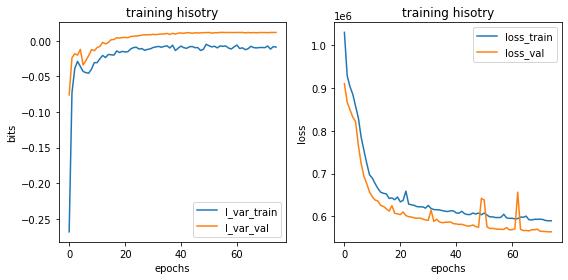

In [18]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [19]:
phi = gpmap.x_to_phi(x_test)

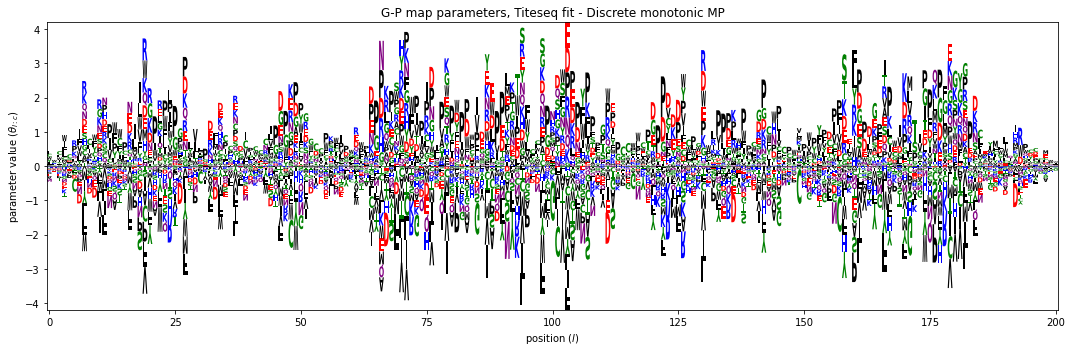

In [20]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True,color_scheme='chemistry')
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters, Titeseq fit - Discrete monotonic MP')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
fig.savefig('ace2rbd_g-p_map_mpa_titeseq_only_DM-MP.png',dpi=300,bbox_inches='tight')
plt.show()

In [21]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

In [22]:
theta_raw_df = pd.DataFrame(theta,columns=alphabet)

In [23]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_single_mut_df.head(22)

,site_RBD,site_SARS2,wildtype,mutant,mutation,mutation_RBD,bind_lib1,bind_lib2,bind_avg,expr_lib1,expr_lib2,expr_avg
0,1,331,N,A,N331A,N1A,-0.05,-0.02,-0.03,-0.14,-0.08,-0.11
1,1,331,N,C,N331C,N1C,-0.08,-0.10,-0.09,-1.56,-0.97,-1.26
2,1,331,N,D,N331D,N1D,0.00,0.07,0.03,-0.75,-0.12,-0.44
3,1,331,N,E,N331E,N1E,0.02,-0.02,0.00,-0.39,-0.24,-0.31
4,1,331,N,F,N331F,N1F,-0.03,-0.16,-0.10,-0.83,-0.57,-0.70
5,1,331,N,G,N331G,N1G,-0.06,-0.02,-0.04,-0.21,-0.29,-0.25
6,1,331,N,H,N331H,N1H,0.01,-0.05,-0.02,-0.86,-0.36,-0.61
7,1,331,N,I,N331I,N1I,-0.06,-0.08,-0.07,-1.05,-0.65,-0.85
8,1,331,N,K,N331K,N1K,-0.01,-0.01,-0.01,-0.17,-0.24,-0.20
9,1,331,N,L,N331L,N1L,-0.08,-0.01,-0.05,-0.81,-0.69,-0.75


In [24]:

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_lib1'].values[0:20]




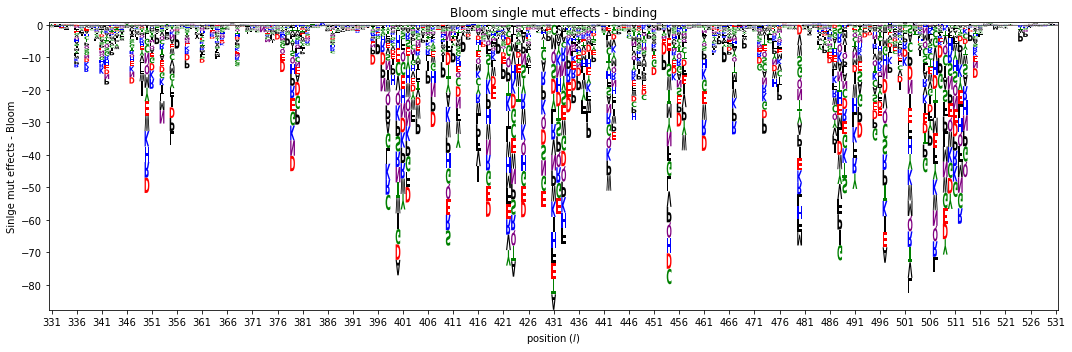

In [25]:
# Get G-P map parameters in matrix form
# theta = np.squeeze(gpmap.weights[1].numpy())

# # Create grid in phi space
# phi_lim = [-5, 3]
# phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# # Create array of allowable y values
# Y = mp_mpa.Y    # Y = number of bins
# y_lim = [-.5, Y-.5]
# y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = mp_mpa.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, axs = plt.subplots(1,1,figsize=[15,5])

# Left panel: draw logo using logomaker
ax = axs
logo = logomaker.Logo(bloom_bind_df.fillna(0), ax=ax,center_values=False, color_scheme='chemistry')
ax.set_ylabel('Sinlge mut effects - Bloom')
ax.set_xlabel(r'position ($l$)')
ax.set_title('Bloom single mut effects - binding')
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(measurement_process,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout()
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only.png',dpi=300,bbox_inches='tight')
plt.show()

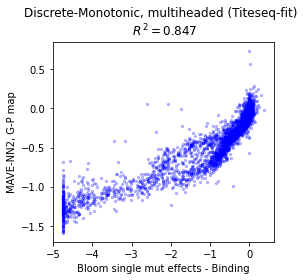

In [26]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=5,alpha=0.25,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--')
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Discrete-Monotonic, multiheaded (Titeseq-fit) \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
#plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

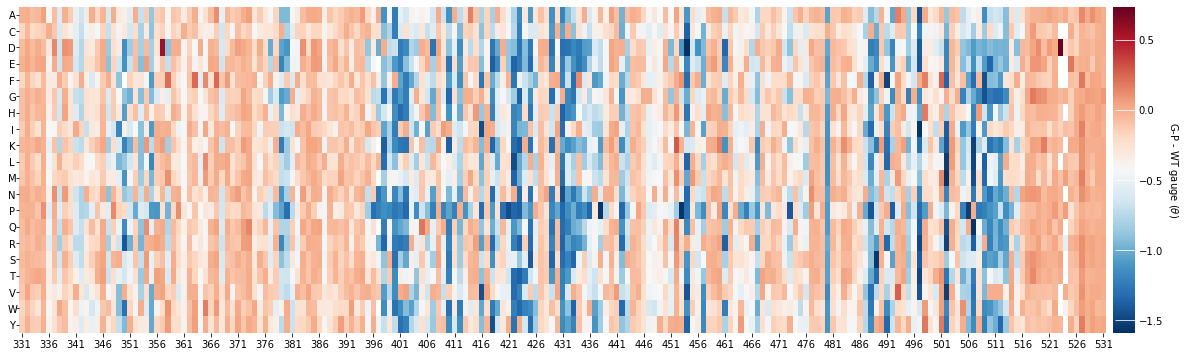

In [27]:

# # Create fig and ax objects
fig, ax = plt.subplots(figsize=[20,6])

# Draw heatmap
ax, cb = mavenn.heatmap(values=theta_lc,
                        alphabet='protein',
                        ax=ax,
                        #gpmap_type='additive',
                        cmap='RdBu_r',
                        cmap_size='2%')

# Style heatmap
ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
#ax.set_xlabel('nucleotide position', labelpad=5)

# Style colorbar
cb.set_label('G-P - WT gauge ($\\theta$)',
             labelpad=10, ha='center', va='center', rotation=-90)
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')

In [28]:
np.save('titeseq_gpmap_discrete_monotonic',logo.df.values.ravel())

In [29]:
sortseq_gpmap = np.load('sortseq_gpmap_monotonic_agnostic.npy')
titeseq_gpmap = np.load('titeseq_gpmap_discrete_monotonic.npy')

In [30]:
# plt.figure(figsize=(5,5))
# # Compute R^2 between yhat_test and y_test
# Rsq = np.corrcoef(sortseq_gpmap,titeseq_gpmap)[0, 1]**2

# # Style plot
# xlim = [-1.5, 1.5]

# plt.scatter(sortseq_gpmap,titeseq_gpmap,s=4,color='blue',alpha=0.2)
# plt.xlabel('Sortseq G-P map parameters')
# plt.ylabel('Titeseq G-P map parameters')
# plt.title(f'$R^2$={Rsq:.3}');
# plt.plot(xlim, xlim, '--', color='k', label='diagonal')
# plt.xlim(xlim)
# plt.ylim(xlim)
# plt.show()

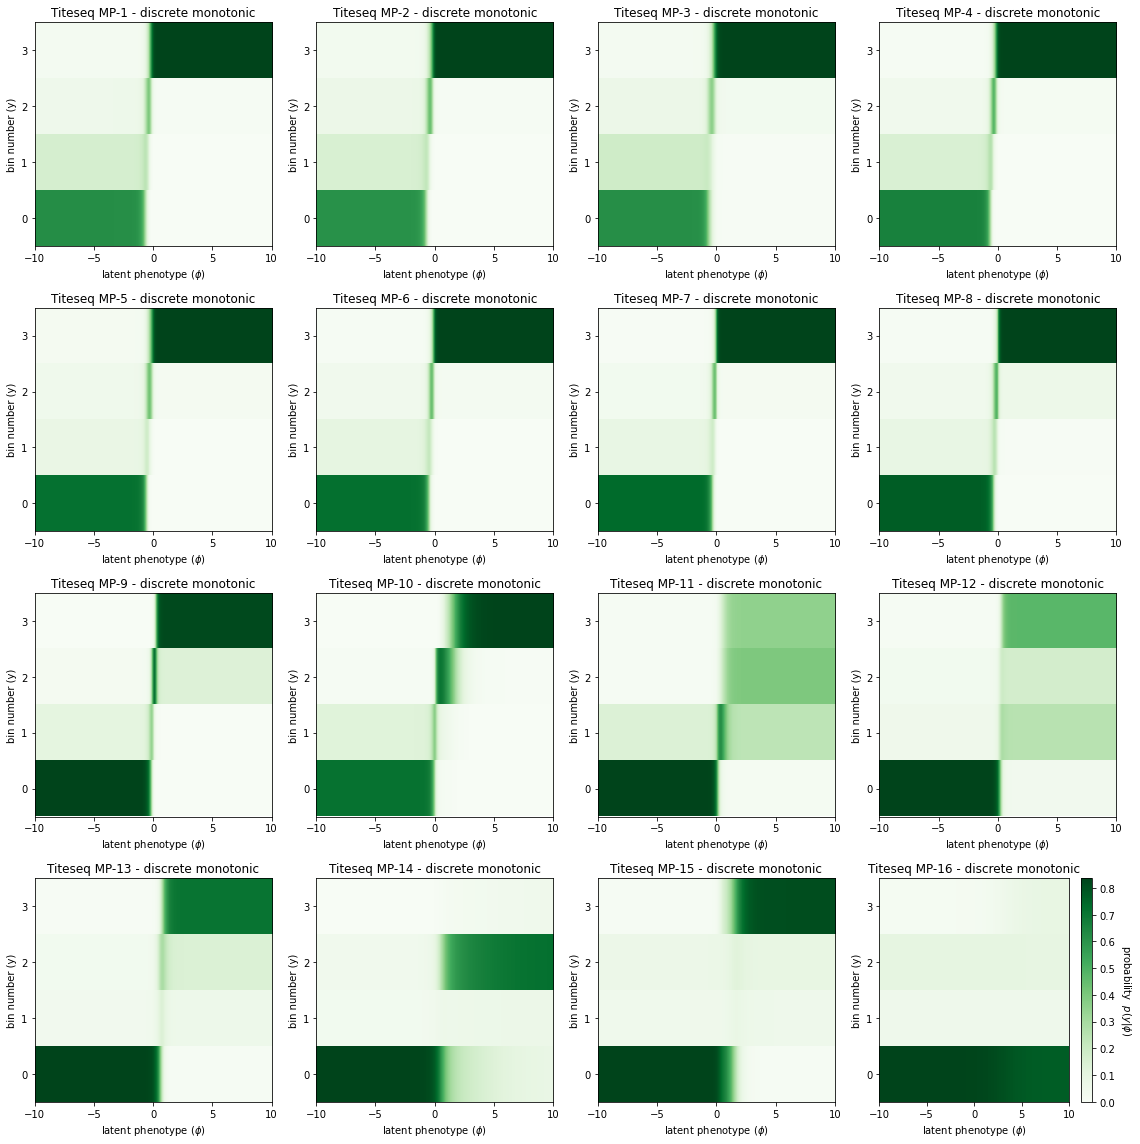

In [31]:
# Create grid in phi space
phi_lim = [-10, 10]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1} - discrete monotonic')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_mpa_measurment_prcoess_expression_monotonic.png',dpi=300,bbox_inches='tight')
